--Guilherme Frutuoso de Almeida--

guilhermefa@alu.ufc.br

#Esse documento colab refere-se ao segundo modelo preditivo do desafio CIENTISTA DE DADOS

Apesar d

In [1]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('desafio_manutencao_preditiva_treino.csv')

df.head()

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure
3,6,M14865,M,298.1,308.6,1425,41.9,11,No Failure
4,7,L47186,L,298.1,308.6,1558,42.4,14,No Failure


In [9]:
df['Failure Type']=df['failure_type'].replace({'No Failure':0,'Heat Dissipation Failure':1,'Overstrain Failure':2,'Power Failure':3,'Random Failures':4,'Tool Wear Failure':5})

In [20]:
air_temperature_k = pd.pivot_table(df, index=['Failure Type', 'process_temperature_k'], values=['air_temperature_k'], aggfunc='mean')

In [16]:
rotational_speed_rpm = pd.pivot_table(df, index=['Failure Type', 'process_temperature_k'], values=['rotational_speed_rpm'], aggfunc='mean').sort_values(['Failure Type',
                                                                                                       'rotational_speed_rpm'], ascending=False)

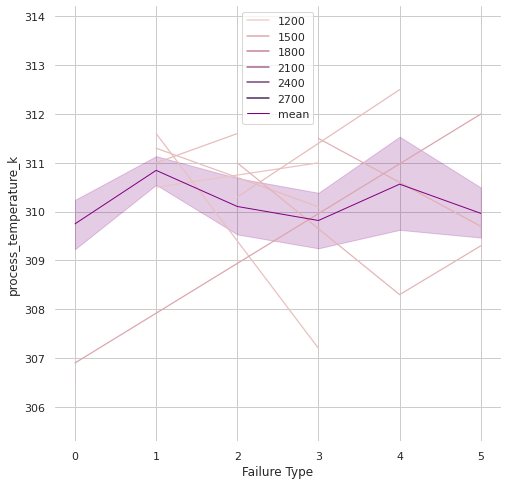

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(8,8))
sns.despine(f, left=True, bottom=True)
ax=sns.lineplot(data=rotational_speed_rpm.reset_index(),x='Failure Type',y='process_temperature_k',hue='rotational_speed_rpm',
               sizes=(1, 8), linewidth=1.25)
ax2=sns.lineplot(data=rotational_speed_rpm.reset_index(),x='Failure Type',y='process_temperature_k',estimator='mean',
               sizes=(1, 8), linewidth=1,ci=95,color='purple',label='mean')

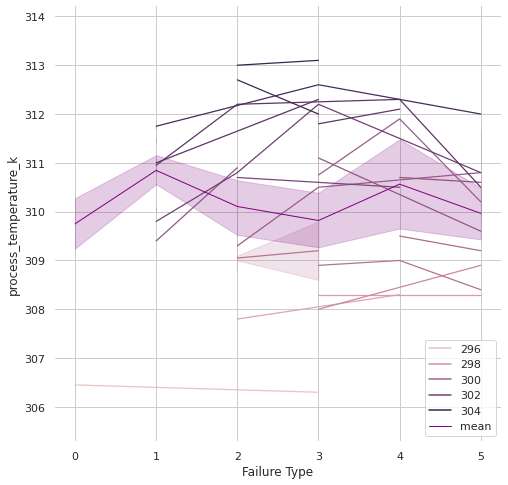

In [27]:
f, ax = plt.subplots(figsize=(8,8))
sns.despine(f, left=True, bottom=True)
ax=sns.lineplot(data=air_temperature_k.reset_index(),x='Failure Type',y='process_temperature_k',hue='air_temperature_k',
               sizes=(1, 8), linewidth=1.25)
ax2=sns.lineplot(data=air_temperature_k.reset_index(),x='Failure Type',y='process_temperature_k',estimator='mean',
               sizes=(1, 8), linewidth=1,ci=95,color='purple',label='mean')

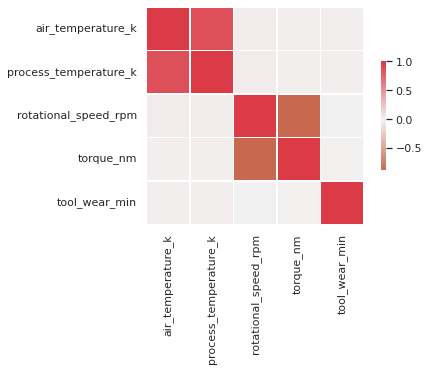

In [28]:
cmap = sns.diverging_palette(20,10, as_cmap=True)
sns.heatmap(df[['air_temperature_k','process_temperature_k','rotational_speed_rpm','torque_nm','tool_wear_min']].corr(), vmax=1, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink":.5})

In [31]:
df = pd.read_csv('desafio_manutencao_preditiva_treino.csv')

In [32]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')
df['air_temperature_k'] = qt.fit_transform(df[['air_temperature_k']].values.reshape(-1,1))
df['process_temperature_k'] = qt.fit_transform(df[['process_temperature_k']].values.reshape(-1,1))
df['rotational_speed_rpm'] = qt.fit_transform(df[['rotational_speed_rpm']].values.reshape(-1,1))
df['torque_nm'] = qt.fit_transform(df[['torque_nm']].values.reshape(-1,1))
df['tool_wear_min'] = qt.fit_transform(df[['tool_wear_min']].values.reshape(-1,1))

Plot for AIR_TEMPERATURE_K: total counts = 6667


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


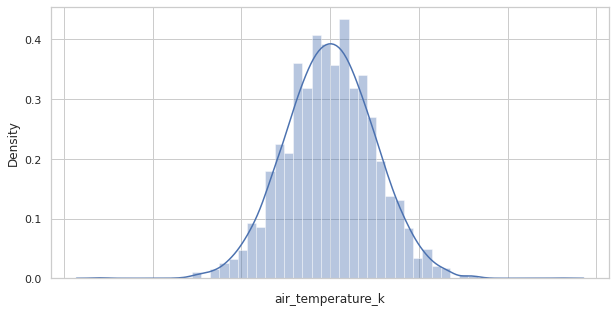

Plot for PROCESS_TEMPERATURE_K: total counts = 6667


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


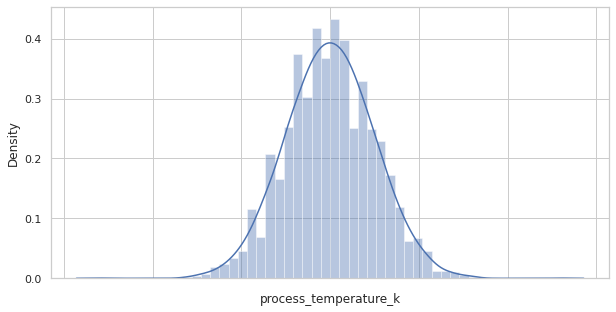

Plot for ROTATIONAL_SPEED_RPM: total counts = 6667


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


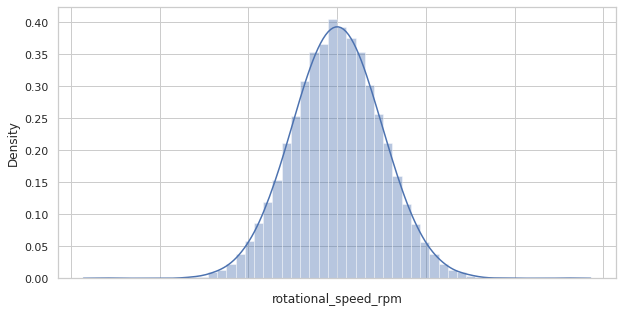

Plot for TORQUE_NM: total counts = 6667


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


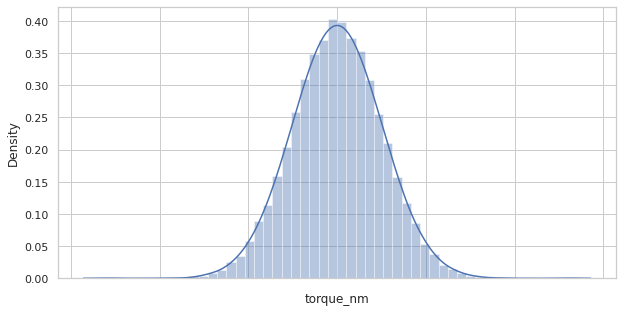

Plot for TOOL_WEAR_MIN: total counts = 6667


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


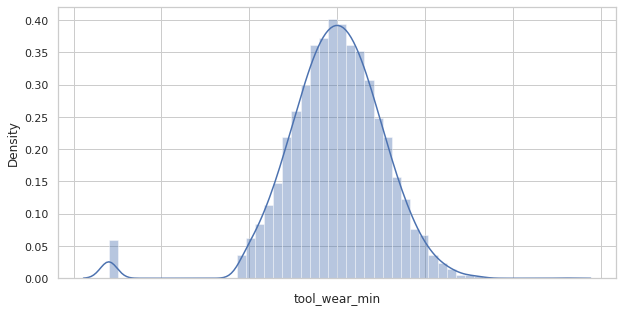

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

df_explore = df[['air_temperature_k', 'process_temperature_k', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']]
for cat in df_explore:
    cat_num = df_explore[cat]
    print("Plot for %s: total counts = %d" % (cat.upper(), len(cat_num)))
    f, ax = plt.subplots(figsize=(10,5))
    plot = sns.distplot(cat_num)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
    plt.show()

In [34]:
df['failure_type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [35]:
labels = df['failure_type'].unique()
i = 0
idx2class = {} 
class2idx = {}
for tp in labels:
    idx2class[i] = tp
    class2idx[tp] = i
    i += 1
idx2class

{0: 'No Failure',
 1: 'Power Failure',
 2: 'Tool Wear Failure',
 3: 'Overstrain Failure',
 4: 'Random Failures',
 5: 'Heat Dissipation Failure'}

In [36]:
df['label'] = df['failure_type'].replace(class2idx)

In [85]:
def stratified_split(df, target, val_percent=0.2):
    classes=list(df[target].unique())
    train_idxs, val_idxs = [], []
    for c in classes:
        idx=list(df[df[target]==c].index)
        np.random.shuffle(idx)
        val_size=int(len(idx)*val_percent)
        val_idxs+=idx[:val_size]
        train_idxs+=idx[val_size:]
    return train_idxs, val_idxs


train_idxs, val_idxs = stratified_split(df, 'label', val_percent=0.25)

val_idxs, test_idxs = stratified_split(df[df.index.isin(val_idxs)], 'label', val_percent=0.5)

def test_stratified(df, col):
    classes=list(df[col].unique())
    
    for c in classes:
        print(f'Proportion of records with {c}: {len(df[df[col]==c])*1./len(df):0.2} ({len(df[df[col]==c])} / {len(df)})')

train_df = df[df.index.isin(train_idxs)]
X_train = train_df[['air_temperature_k', 'process_temperature_k', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']].values
Y_train = train_df[['label']].values

val_df = df[df.index.isin(val_idxs)]
X_val = val_df[['air_temperature_k', 'process_temperature_k', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']].values
Y_val = val_df[['label']].values

test_df = df[df.index.isin(test_idxs)]
X_test = test_df[['air_temperature_k', 'process_temperature_k', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']].values
Y_test = test_df[['label']].values


In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
#store data, all in numpy arrays
training_data = {'X_train':X_train,'Y_train':Y_train,
                'X_val': X_val,'Y_val':Y_val,
                'X_test': X_test,'Y_test':Y_test}

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=None,random_state=27,
                       verbose=1)
clf.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished


RandomForestClassifier(random_state=27, verbose=1)

In [43]:
predicted_labels = clf.predict(training_data['X_test'])
accuracy_score(training_data['Y_test'], predicted_labels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.983132530120482

In [ ]:
params = {
    'n_estimators'      : range(100,500,50),
    'max_depth'         : [8, 9, 10, 11, 12],
    'max_features': ['auto'],
    'criterion' :['gini']
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch1 = GridSearchCV(estimator = clf, param_grid = params, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch1.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))

In [ ]:
clf2 = gsearch1.best_estimator_

params1 = {
    'n_estimators'      : range(200,300,10),
    'max_depth'         : [11, 12,13]
}

gsearch2 = GridSearchCV(estimator = clf2, param_grid = params1, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch2.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))

In [53]:
clf3 = gsearch2.best_estimator_

params2 = {
    'n_estimators'      : range(200,220,5),
    'max_depth'         : [13,14,15]
}

gsearch3 = GridSearchCV(estimator = clf3, param_grid = params2, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch3.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.3s finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=11, n_estimators=200,
                                              random_state=27, verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [13, 14, 15],
                         'n_estimators': range(200, 220, 5)},
             scoring='f1_micro', verbose=10)

In [54]:
clf4 = gsearch3.best_estimator_

params3 = {
    'max_depth'         : range(14,20,1)
}

gsearch4 = GridSearchCV(estimator = clf4, param_grid = params3, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch4.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.9s finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=13, n_estimators=200,
                                              random_state=27, verbose=1),
             n_jobs=-1, param_grid={'max_depth': range(14, 20)},
             scoring='f1_micro', verbose=10)

In [55]:
clf5 = gsearch4.best_estimator_

params4 = {
    'max_depth'         : range(19,50,2)
}

gsearch5 = GridSearchCV(estimator = clf5, param_grid = params4, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch5.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.3s finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=16, n_estimators=200,
                                              random_state=27, verbose=1),
             n_jobs=-1, param_grid={'max_depth': range(19, 50, 2)},
             scoring='f1_micro', verbose=10)

In [56]:
clf6 = gsearch5.best_estimator_

params5 = {
    'max_depth'         : [24,25,26]
}

gsearch6 = GridSearchCV(estimator = clf6, param_grid = params5, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch6.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.4s finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=23, n_estimators=200,
                                              random_state=27, verbose=1),
             n_jobs=-1, param_grid={'max_depth': [24, 25, 26]},
             scoring='f1_micro', verbose=10)

In [57]:
final_clf = gsearch6.best_estimator_
final_clf.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))
predicted_labels = final_clf.predict(training_data['X_test'])
train_pred = final_clf.predict(training_data['X_train'])
print('Train Accuracy:'+str(accuracy_score(training_data['Y_train'], train_pred)))
print('Train F1-Score(Micro):'+str(f1_score(training_data['Y_train'], train_pred,average='micro')))
print('------')
print('Test Accuracy:'+str(accuracy_score(training_data['Y_test'], predicted_labels)))
print('Test F1-Score(Micro):'+str(f1_score(training_data['Y_test'], predicted_labels,average='micro')))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train Accuracy:1.0
Train F1-Score(Micro):1.0
------
Test Accuracy:0.983132530120482
Test F1-Score(Micro):0.983132530120482


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished


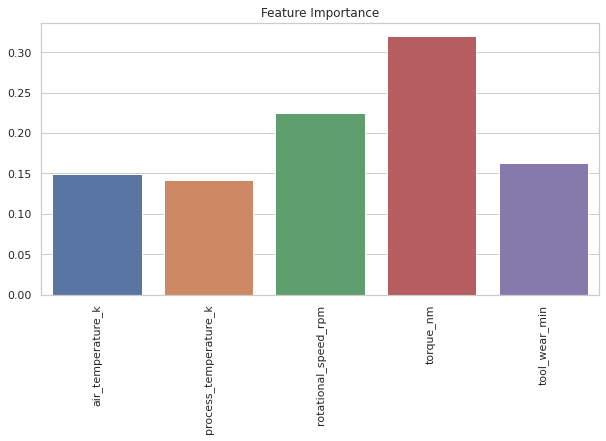

In [64]:
features=['air_temperature_k', 'process_temperature_k', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']
f, ax = plt.subplots(figsize=(10,5))
plot = sns.barplot(x=features, y=final_clf.feature_importances_)
ax.set_title('Feature Importance')
plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
plt.show()

In [65]:
import xgboost as xgb
import matplotlib.pyplot as plt

#allow logloss and classification error plots for each iteraetion of xgb model
def plot_compare(metrics,eval_results,epochs):
    for m in metrics:
        test_score = eval_results['val'][m]
        train_score = eval_results['train'][m]
        rang = range(0, epochs)
        plt.rcParams["figure.figsize"] = [6,6]
        plt.plot(rang, test_score,"c", label="Val")
        plt.plot(rang, train_score,"orange", label="Train")
        title_name = m + " plot"
        plt.title(title_name)
        plt.xlabel('Iterations')
        plt.ylabel(m)
        lgd = plt.legend()
        plt.show()
        
def fitXgb(sk_model, training_data=training_data,epochs=300):
    print('Fitting model...')
    sk_model.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))
    print('Fitting done!')
    train = xgb.DMatrix(training_data['X_train'], label=training_data['Y_train'])
    val = xgb.DMatrix(training_data['X_val'], label=training_data['Y_val'])
    params = sk_model.get_xgb_params()
    metrics = ['mlogloss','merror']
    params['eval_metric'] = metrics
    store = {}
    evallist = [(val, 'val'),(train,'train')]
    xgb_model = xgb.train(params, train, epochs, evallist,evals_result=store,verbose_eval=100)
    print('-- Model Report --')
    print('XGBoost Accuracy: '+str(accuracy_score(sk_model.predict(training_data['X_test']), training_data['Y_test'])))
    print('XGBoost F1-Score (Micro): '+str(f1_score(sk_model.predict(training_data['X_test']),training_data['Y_test'],average='micro')))
    plot_compare(metrics,store,epochs)
    features = ['air_temperature_k', 'process_temperature_k', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']
    f, ax = plt.subplots(figsize=(10,5))
    plot = sns.barplot(x=features, y=sk_model.feature_importances_)
    ax.set_title('Feature Importance')
    plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
    plt.show()

Fitting model...
Fitting done!
[0]	val-mlogloss:1.78544	val-merror:0.029976	train-mlogloss:1.78425	train-merror:0.023986
[100]	val-mlogloss:0.069464	val-merror:0.020384	train-mlogloss:0.011933	train-merror:0.001799
[200]	val-mlogloss:0.077757	val-merror:0.022782	train-mlogloss:0.004704	train-merror:0
[299]	val-mlogloss:0.082961	val-merror:0.022782	train-mlogloss:0.003164	train-merror:0
-- Model Report --
XGBoost Accuracy: 0.9879518072289156
XGBoost F1-Score (Micro): 0.9879518072289156


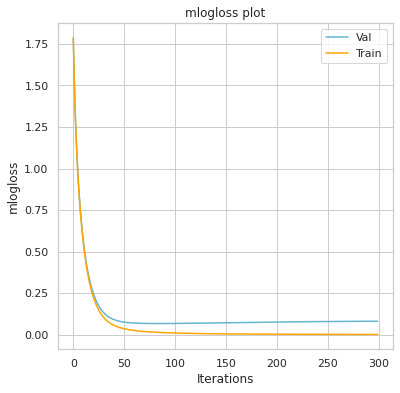

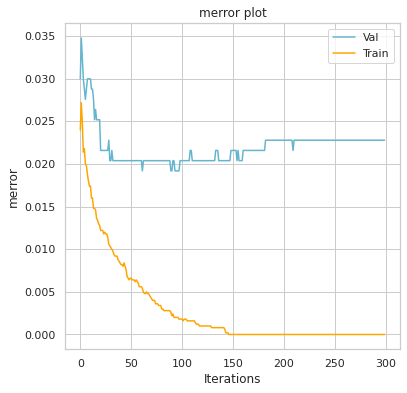

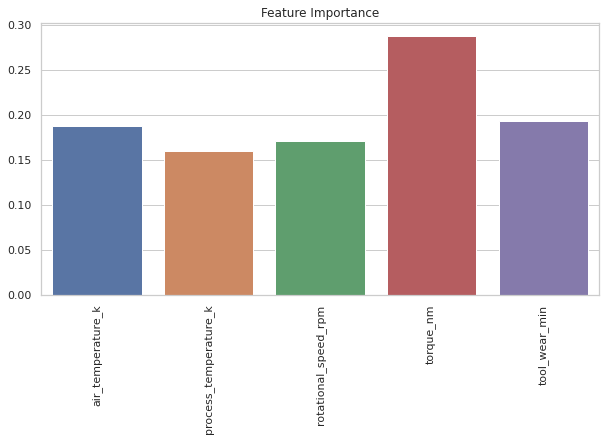

In [66]:
from xgboost.sklearn import XGBClassifier
#initial model
xgb1 = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=9,
                    seed=27)
fitXgb(xgb1, training_data)

In [67]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch1 = GridSearchCV(estimator = xgb1, param_grid = param_test1, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch1.fit(X_train, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.8, max_depth=5,
                                     n_estimators=1000, nthread=4, num_class=9,
                                     objective='multi:softprob', seed=27,
                                     subsample=0.8),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='f1_micro', verbose=10)

Fitting model...
Fitting done!
[0]	val-mlogloss:1.78524	val-merror:0.029976	train-mlogloss:1.78343	train-merror:0.022187
[100]	val-mlogloss:0.07301	val-merror:0.020384	train-mlogloss:0.007521	train-merror:0.0008
[200]	val-mlogloss:0.080356	val-merror:0.020384	train-mlogloss:0.003385	train-merror:0
[299]	val-mlogloss:0.084598	val-merror:0.020384	train-mlogloss:0.00248	train-merror:0
-- Model Report --
XGBoost Accuracy: 0.9879518072289156
XGBoost F1-Score (Micro): 0.9879518072289156


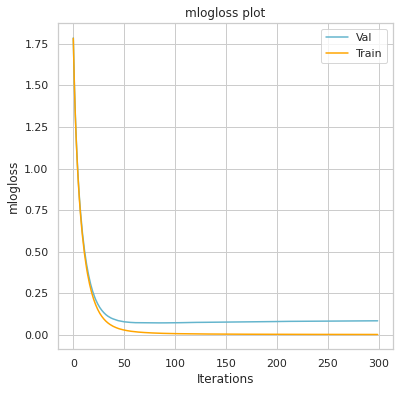

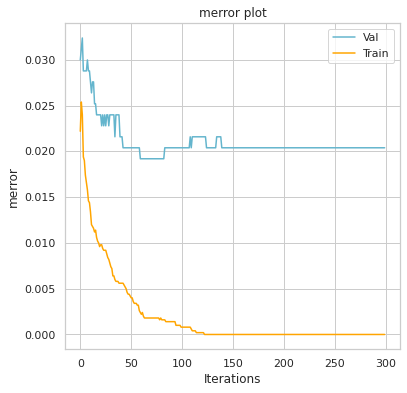

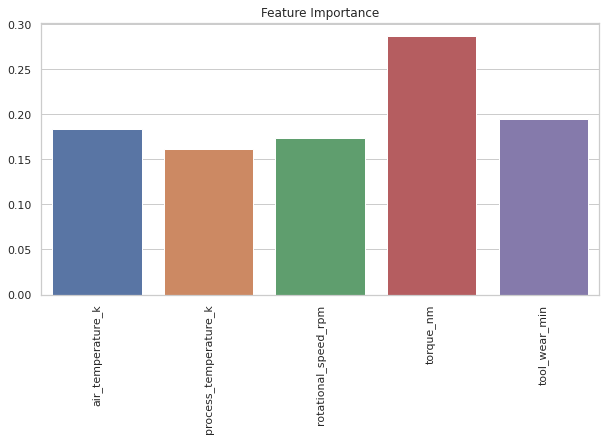

In [68]:
xgb2 = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=9,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=9,
                    seed=27)

fitXgb(xgb2, training_data)

In [69]:
param_test2 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch2 = GridSearchCV(estimator = xgb2, param_grid = param_test2, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=3)
gsearch2.fit(X_train, Y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=0.8, max_depth=9,
                                     n_estimators=1000, nthread=4, num_class=9,
                                     objective='multi:softprob', seed=27,
                                     subsample=0.8),
             n_jobs=-1, param_grid={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
             scoring='f1_micro', verbose=10)

Fitting model...
Fitting done!
[0]	val-mlogloss:1.78525	val-merror:0.029976	train-mlogloss:1.78344	train-merror:0.022187
[100]	val-mlogloss:0.073599	val-merror:0.020384	train-mlogloss:0.007614	train-merror:0.0008
[200]	val-mlogloss:0.080682	val-merror:0.021583	train-mlogloss:0.003452	train-merror:0
[299]	val-mlogloss:0.084601	val-merror:0.021583	train-mlogloss:0.002529	train-merror:0
-- Model Report --
XGBoost Accuracy: 0.9879518072289156
XGBoost F1-Score (Micro): 0.9879518072289156


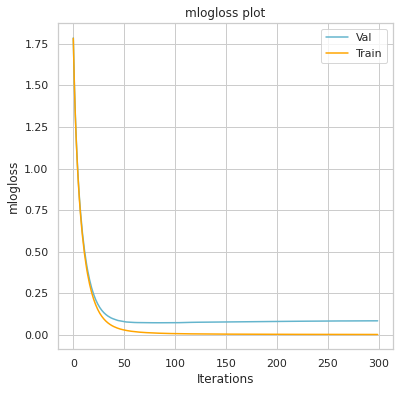

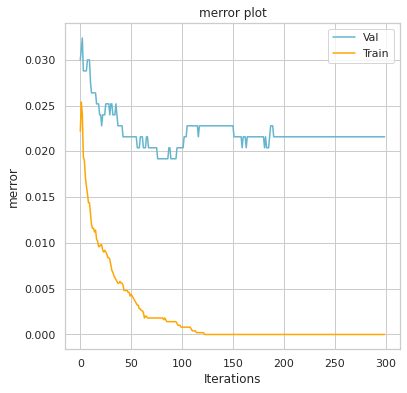

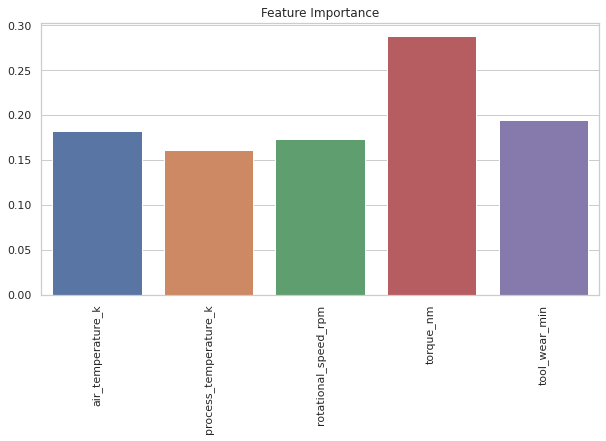

In [70]:
xgb3 = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=9,
                    min_child_weight=1,
                    reg_alpha=0.01,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=9,
                    seed=27)

fitXgb(xgb3, training_data)

In [71]:
import pickle

pickl = {'model': xgb3}
pickle.dump(pickl, open('model_file'+'.p','wb'))

In [72]:
file_name = 'model_file.p'
with open(file_name,'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [112]:
df_test = pd.read_csv("desafio_manutencao_preditiva_teste.csv")
id = df_test['udi']
prod_id = df_test['product_id']
df_test['air_temperature_k'] = qt.fit_transform(df_test[['air_temperature_k']].values.reshape(-1,1))
df_test['process_temperature_k'] = qt.fit_transform(df_test[['process_temperature_k']].values.reshape(-1,1))
df_test['rotational_speed_rpm'] = qt.fit_transform(df_test[['rotational_speed_rpm']].values.reshape(-1,1))
df_test['torque_nm'] = qt.fit_transform(df_test[['torque_nm']].values.reshape(-1,1))
df_test['tool_wear_min'] = qt.fit_transform(df_test[['tool_wear_min']].values.reshape(-1,1))
df_test = df_test.to_numpy()
#np.random.shuffle(df_test)
X_test_real = df_test[:, 3:8]


pred = model.predict(X_test_real)

pred = pd.DataFrame(pred)
X_test_real = pd.DataFrame(X_test_real)

pred.rename(columns={0:"failure_type"}, inplace=True)
X_test_real.rename(columns={0:"air_temperature_k", 1:"process_temperature_k", 2:"rotational_speed_rpm", 3:"torque_nm", 4:"tool_wear_min"}, inplace=True)

predicts = pd.concat([id, prod_id, X_test_real, pred], axis='columns')

"""
{0: 'No Failure',
 1: 'Power Failure ',
 2: 'Tool Wear Failure',
 3: 'Overstrain Failure',
 4: 'Random Failures',
 5: 'Heat Dissipation Failure'}
"""

failure_name = []
for row in predicts['failure_type']:
  if row == 0:
    failure_name.append('No Failure')
  elif row == 0:
    failure_name.append('Power Failure')
  elif row == 0:
    failure_name.append('Overstrain Failure')
  elif row == 0:
    failure_name.append('Random Failures')
  elif row == 0:
    failure_name.append('Heat Dissipation Failure')
  else:
    failure_name.append('Unknown')

predicts['failure_name'] = failure_name

predicts.to_csv('predicts_h2.csv', index=False)

In [113]:
predicts_h2 = pd.read_csv("predicts_h2.csv")
predicts_h2.head()

,udi,product_id,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type,failure_name
0,446,L47625,-1.186981,-0.873515,1.424620,-1.310017,-0.419741,0,No Failure
1,7076,L54255,0.291367,0.238089,0.220058,0.754664,1.169401,0,No Failure
2,1191,L48370,-1.533612,-1.064091,-0.334851,0.214920,-0.840906,0,No Failure
3,2618,L49797,-0.204660,-0.527858,0.961429,-0.404717,-0.445919,0,No Failure
4,5067,L52246,2.345158,2.096521,0.312376,-0.890172,-1.679303,0,No Failure
